In [14]:
# Setup
from IPython.display import Image
from IPython.core.display import HTML
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [15]:
PATH = os.getcwd()

# <div align="center"> **AMS 511 Notebook Project: Mathematica to Python** </div>

## <div align="center"> **Introduction to Financial Markets, the Time Value of Money, and Fixed Income Securities** </div>

### <div align = "center"> **Author:** *Gomes, Marlon* </div>

# **Disclaimer**

The present notebook contains mainly excerpts from the original (Mathematica) notebook by Prof. Robert J. Frey for a course taught in the Fall of 2020. In particular, most textual content is directly quoted and/or copy-pasted while the coding components have been adapted from Mathematica to Python. The author took the liberty to reorganize some of the content to clarify the exposition. In the same interest, additional author's comments and new examples were included. The authors' viewpoints are tagged to distinguish them from Professor Frey's.

## Financial Markets

In economics, a financial market is a mechanism that brings people together to buy and sell (trade) financial securities (such as sotcks and bonds(, commodities (such as precious metals or agricultural good), currencies, and other fungible items of value. 

By bringing buyers and sellers together in one place they can trade more efficiently, reducing costs, and share information, resulting in fairer pricing. 

For more information read: http://en.wikipedia.org/wiki/Financial_market

### Markets

Markets are "places" where people come together to trade goods; having a common currency facilitates this exchange. 

### Financial securities

Financial securities are tradeable assets dealind with the exchange of money and ownership, e.g.,
* currencies: monies of various countries held in trust
* equities: ownership shares of business entities
* debts: contracts for either the right or obligation to either buy or sell another security.

## Quantitative Finance

<b>Quantitative Finance is an applied discipline dealing with the application of mathematical techniques to decision problems in finance. We can divide these problems into two main branches: (1) the pricing of individual financial securities or opportunities and (2) the management of portfolios of such securities and opportunities. Ultimately, such analyses rest on the estimation of cash-flows across time and of the uncertainties associated with those cash-flows.</b>

### Investment Analysis | Financial Modeling
 
<a href="https://en.wikipedia.org/wiki/Valuation_(finance)" target="_blank">Investment analysis</a> or financial modeling is the process of both describing and valuing a financial security or opportunity
* Through comparison with other financial securities or opportunities available to an economic agent, under the presumption that like benefits, costs, and risks will result in like prices, or
* By economic analysis based on market dynamics and equilibrium conditions which are posited or observed to exist in financial markets or the larget economy. 

These two approaches are not mutually exclusive, however, and financial modeling usually involves elements of both. 

### Investment Management | Portfolio Management

<a href="https://en.wikipedia.org/wiki/Investment_management" target="_blank">Investment management</a> or portfolio management is the creation and continued management of a portfolio of various investments to meet the economic goals of investors. It typically involves the trade-off of two aspects of investment performance at specified time horizons.
* <i>Reward</i> is represented by various measures which describe the economic benefits realized by the portfolio over time. The simplest example is the expected return of the portfolio. 
* <i>Risk</i> is represented by various measures which describe the uncertainties associated with economic returns realized by the portfolio. The simplest example is the volatility (or variance) of the return of the portfolio. 

### The Comparison Principle

Some investments can be evaluated by comparint them with other available investments. Financial markets, in particular, have features that allow us to quantify and compare different alternatives in purely economic terms. 

### Arbitrage

An <a href="https://en.wikipedia.org/wiki/Arbitrage" target="_blank">arbitrage</a>, put simply, is a risk-free profit. when one talks about a market being "fair", that usually means arbitrage is impossible.

#### Mispricing example

Consider an agent who buys an asset for a given price in one market and then simultaneously sells the identical asset for a higher price in another. Sometimes this makes sense, e.g., one market might be near the asset's producers and the other near its consumers. However, if the two markets are equivalent, then the agent can make a theoretically infinite riskless profit by continuously buying in the "cheap" market and selling in the expensive one. 

#### Coommodity Pricing Example

Consider the pricing of bushels of winter wheat which are sold on an organized commodities market (example: https://www.cmegroup.com/trading/agricultural/grain-and-oilseed/wheat_contract_specifications.html). Each bushel of wheat is much like any other (i.e., they are fungible) and the balance of supply and demand will reveal a price. Regardless of whether a person thinks the price of wheat will rise or fall in the future, there is no basis for one person to buy or sell wheat at a different price than any other person.

#### Risk-free rate

There is a risk-free rate that represents a floor at which one can borrow or lend money. There can be only one risk-free rate; otherwise, a person could borrow at the lower rate and invest at the higher, making an infinite riskless return.

This doesn't mean that earning more than the risk-free rate is impossible, only that it cannot be guaranteed. The arbitrage-free assumption means that there is no certain reward in excess of this without some risk.

### Uncertainty and Risk Aversion in Markets

there are many sources of uncertainty in markets. Consider a share of stock in a company; the price is affected by factors internal to the company (e.g., its earnings) and outside the company (e.g., inflation). 

All else being equal, a rational investor prefers a less risky alternative to a more risky one.

## Theory of Interest

<b> Cash that one has today is worth more than the same amount of cash in the future. This is the <i>time value of money</i>. If one borrows $F$ today one must pay $(F+rF)$, $r>0$, in the future so that the value of the amount borrowed equals the value of the amount paid. This factor $r$ is called the interest rate. </b>

### Cash flow diagrams

Cash flow diagrams are a simple, but extremely useful, tool for visualizing the cash flows associated with many investment problems. 

#### Single Payment Example

The cash flow diagram for a situation in which someone borrows $\$100.00$ today and pays off the loan with a single payment of $\$105.00$ after one year is

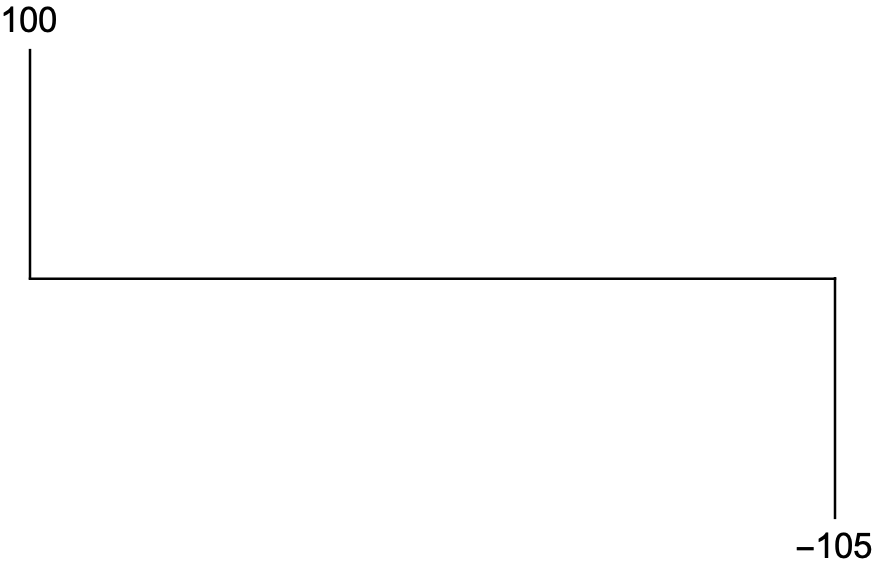

In [16]:
Image(filename = PATH + "/Images/img1.png", width = 300, height = 200)

The additional $\$5.00$ is, of course, the interest paid on the load and represents an interest rate of $5\%$.

#### Multiple Payments Example

Another example would be a case in which the borrower borrows $\$100$ and pays back the load with two payments, one at six months and the other at a year, of $\$51.88$ each. the cash flow diagram is that case would be 

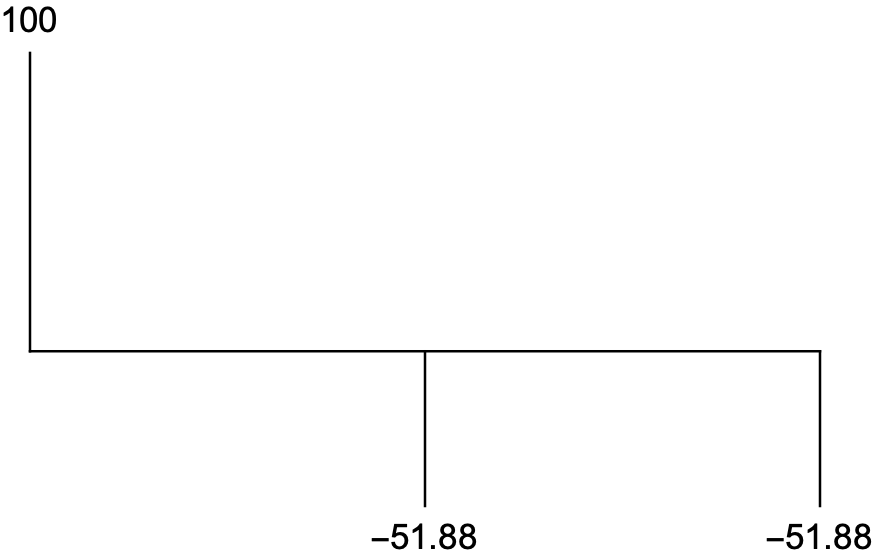

In [17]:
Image(filename = PATH + "/Images/img2.png", 
      width = 300, 
      height = 200)

The additional $\$1.88 + \$1.88 = \$ 3.76$ represents the interest on the loan. Computing the interest rate here is slightly more complicated and will be covered shortly.

### Loan: A Contract to Borrow Money Now and Repay it in the Future

A loan is a contract: the loaner gives the borrower a certain amount of money; the borrower agrees to repay this amount plus interest by making payments at specified points in time until the principal (the amount borrowed) plus interest is paid off.

#### A Simple Loan Example I - Multiple Payments

Frank loans $\$100$ at $10\%$ annual interest for 4 years to Andrea. 

* The principal, $\$100$, is the amount borrowed.
* The interest rate, $10\%$, represents the time value of money.
* The term, $4$ years, is the lifetime of the loan. 
* There will be additional conditions describing the details of the interest computations at the timing of payments from borrower to loaner.

In this case, the loan agreement stipulates that each year Andrea will pay the $10\%$ interest on the $\$100$ principal and at the end of the fourth year return the principal amount as well. The loadn's cash flow diagram from Andrea's, the borrower, perspective is:

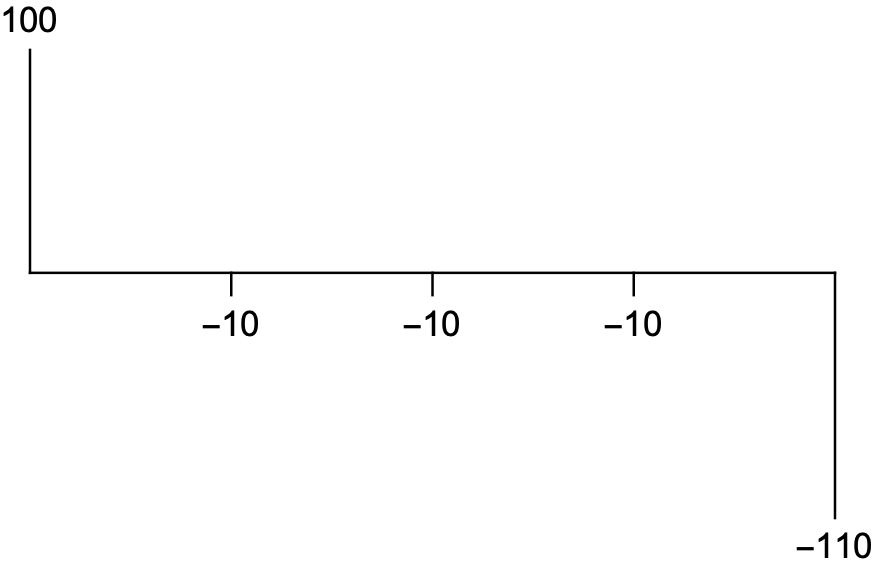

In [18]:
Image(filename = PATH + "/Images/img3.png", 
      width = 300, 
      height = 200)

#### A Simple Loan Example II - Single Payment

Consider the same loan above, except that Frank loans Andrea the $\$100$ at $10\%$ interest and receives a single lump-sum payment at the end of $4$ years. Computing the interest due, and hence the payment, depends on certain conventions. 

* <b> Simple interest:</b> In simple interest the interest is compounded solely on the principal amount of the loan. In the load example here the final payment would be computed by

In [19]:
100*(1+4*0.1)

140.0

The cash flow diagram for this loan would be

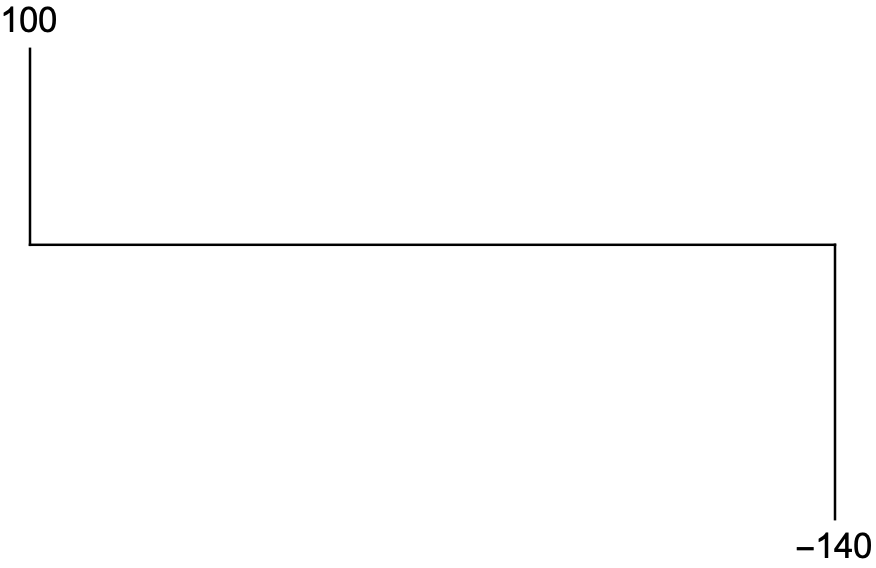

In [20]:
Image(filename = PATH + "/Images/img4.png", 
      width = 300, 
      height = 200)

Thus, after 4 years Andrea pays Frank $\$140$, the return of the $\$100$ originally borrowed plus $\$40$ interest.

* <b>Compound interest:</b> In compound interest, when interest accrues it is added to the balance owed. Future accruals of interest are applied to this new balance. If payments are made prior to the ending of the loan, then these are deducted from the balance. In our example, if interest is compounded semi-annually then every 6 months $5\%$ interest (i.e., half of the annual rate) would be charged and accumulated in the balance owed. Over 4 years, there are 8 such compounding events:
$$ 100\left(1+\frac{0.1}{2}\right)^{4\cdot 2} = 100(1.05)^8$$

In [21]:
round(100*(1.05)**8,2)

147.75

The cash flow diagram for this loan would be

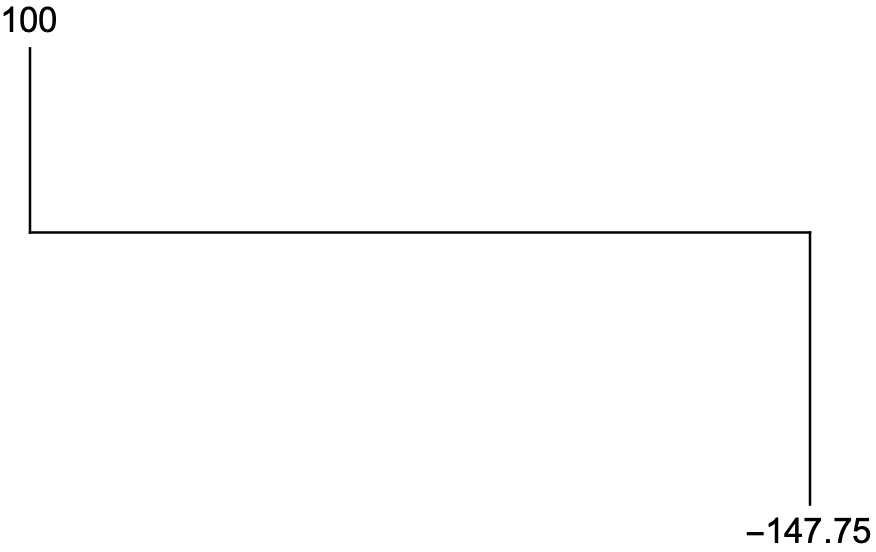

In [22]:
Image(filename = PATH + "/Images/img5.png", width = 300, height = 200)

Consider now the case of monthly compounding,

In [23]:
round(100*(1+0.1/12)**(4*12),2)

148.94

Or annually,

In [24]:
round(100*(1+0.1)**4,2)

146.41

In general, if we are charged interest on a present value of $PV$ dollars at an interest of $r$ compounded at $k$ times per year for $n$ years, then we receive a future falue $FV$:
$$FV = PV\left(1+\frac{r}{k}\right)^{nk}$$

In [25]:
def FV(p, r, k, n):
    """Given a value of pricipal p, nominal annual rate r, 
    compounding frequency k (accruals per year), and a term n 
    (in years), computes the future value of the loan."""
    return p*(1+r/k)**(n*k)

Returning to the example of semi-annual compounding, we have:

In [26]:
FV(100,0.1,2,4)

147.7455443789063

### Accruing Continuously Compounded Interest

As the compounding frequency increases, interest accrues more rapidly, but ir does approach a limit. Consider the return of a loan of $\$1$ at a $10\%$ rate compounded for a year, at various frequencies.

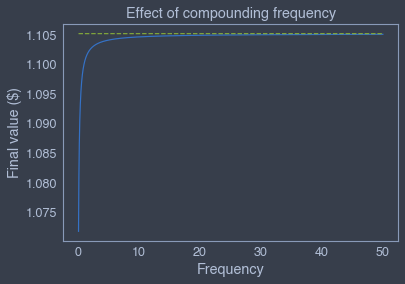

In [27]:
# Data for plotting
t = np.arange(0.1, 50.0, 0.01)
s = np.array([FV(1, 0.1, freq, 1) for freq in t])
asymp = np.full((len(s)),np.exp(0.1))

fig, ax = plt.subplots(figsize = (6,4))
ax.plot(t, s)
ax.plot(t,asymp, '--')

ax.set(xlabel='Frequency', ylabel='Final value ($)',
       title='Effect of compounding frequency')
ax.grid()

plt.show()

In the limit when the frequency k goes to infinity, we approach the asymptote given by
$$ FV = \lim_{k \to \infty} PV\left(1+\frac{r}{k}\right)^{nk} = PVe^{nr}$$

In [28]:
def FV_cont(p,r,n):
    """Given a value of pricipal p, nominal annual rate r,
    and a term n (in years), for a continuously compounded loan,
    computes the future value."""
    return p*math.exp(n*r)

The same loan as before, compounded continuously, would yield

In [29]:
FV_cont(100,0.10,4)

149.18246976412703

### Effective Annual Interest Rates

The <i>effective annual interest rate</i>, $r_{eff}$, of a nominal rate $r$ compounded with frequency $k$ is the rate that when compounded annually results int he same interest accrual:

* $1+r_{eff} = \left(1+\frac{r}{k}\right)^{k} \Longrightarrow r_{eff} = \left(1+\frac{r}{k}\right)^{k} - 1,$ in the discrete case;
* $1+r_{eff} = e^r \Longrightarrow r_{eff} = e^r-1$, in the continuous case.

#### Example

Consider a 2-year instrument with nominal rate $r=0.05$ and $k=12$. Its effective annual interest rate is $5.1\%$:

In [30]:
(1+0.05/12)**12-1

0.051161897881732976

For $k=4$ the effective annual interest rate is slightly lower:

In [31]:
(1+0.05/4)**4-1

0.05094533691406222

Finally, in the case of continuous interest:

In [32]:
math.exp(0.1)-1

0.10517091807564771

Be careful not to confuse the term of the debt with the compounding frequency. The fact that we were dealing with a 2-year instrument is irrelevant here. 

## Calendar conventions

In computing the length of time between two dates various calendar conventions are observed, often to simplify computation. 

These are artifacts of the time before computers when these calculations were performed manually, but they remain standard in individual financial markets. For more information, read: https://en.wikipedia.org/wiki/Day_count_convention

In [33]:
import datetime as dt
from datetime import datetime

We'll examine two conventions in common use: Actual/Actual and 30/360. Notice that terminology varies from market to market and even from instrument to instrument within a market. Sometimes similar but slightly different converntions have the same name, thus, context is important. 

A large part of the sotfware base for financial computations is dedicated to calendar computations covering computing the number of days between dates, the number of business (i.e., trading) days between dates, identification of holidays (which vary from country to country and market to market within a country), calculating the standard expiration dates for various contracts, and many others related to time. The module <i> datetime </i> and the package <i> Numpy <i> provide much of the functionality we need.

In [34]:
help(dt.timedelta)

Help on class timedelta in module datetime:

class timedelta(builtins.object)
 |  Difference between two datetime values.
 |  
 |  timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
 |  
 |  All arguments are optional and default to 0.
 |  Arguments may be integers or floats, and may be positive or negative.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, v

In [35]:
help(np.busday_count)

Help on function busday_count in module numpy:

busday_count(...)
    busday_count(begindates, enddates, weekmask='1111100', holidays=[], busdaycal=None, out=None)
    
    Counts the number of valid days between `begindates` and
    `enddates`, not including the day of `enddates`.
    
    If ``enddates`` specifies a date value that is earlier than the
    corresponding ``begindates`` date value, the count will be negative.
    
    .. versionadded:: 1.7.0
    
    Parameters
    ----------
    begindates : array_like of datetime64[D]
        The array of the first dates for counting.
    enddates : array_like of datetime64[D]
        The array of the end dates for counting, which are excluded
        from the count themselves.
    weekmask : str or array_like of bool, optional
        A seven-element array indicating which of Monday through Sunday are
        valid days. May be specified as a length-seven list or array, like
        [1,1,1,1,1,0,0]; a length-seven string, like '11111

Here we'll create our own function which calculates day counts according to a few conventions (passed as options). 

In [36]:
def day_count(start_date : dt.datetime, end_date : dt.datetime, convention = 'Actual/Actual', inclusive = False):
    """ Computed day coount between two days, according to 
    convention (see list below). Option to include the last date.
    Format: YYYY-MM-DD
    Conventions:
        * Actual/Actual (default): each month and year is composed 
        of its actual amount of days. 
        * 30/360: months are assumed to have 30 days and a year 
        is composed of 12 such months.
    """
    if isinstance(start_date, str):
        start = dt.datetime.strptime(start_date,'%Y-%m-%d')
    else: start = start_date
    if isinstance(end_date, str):
        end = dt.datetime.strptime(end_date, '%Y-%m-%d')
    else:
        end = end_date
    if start > end: 
        raise ValueError("Start date must be earlier than end date.")
    if convention == 'Actual/Actual':
        return (end - start).days
    if convention == '30/360':
        year_difference = 360*(end.year - start.year)
        month_difference = 30*((end.month - start.month) - 1)
        days_difference = min(end.day, 30) + max(30 - start.day, 0)
        return year_difference + month_difference + days_difference
    

In [37]:
# Tests

# Mixed input
print(day_count(dt.datetime.now(), '2020-12-31'))

# Start > end (uncomment to see error)
# print(day_count(dt.datetime.now(), '2020-12-04'))

# default
print(day_count('2018-02-24', '2020-07-12'))

# /360 convention
print(day_count('2018-02-24', '2020-07-12', '30/360'))

9
869
858


## Present and Future Value

The concepts of <i> present value</i> and Mi> future value <.i> help us to think about how interest rates affect the price of many financial securities. 

They also allow us to re-express the price and associated cash flows of an asset in terms of the implied interest rate it pays, giving us a common basis for comparing two assets whose cash flows occurt at different times. 

present and future value of cash flows are basis concepts used in the valuation, and therefore, comparison of cash flows. 

### Single Cash Flow Case

We'll describe future and present value first in terms of single cahs flow. 

#### Future Value
The future value, FV, is the total value realized from investing $S$ at rate $r$, compounded with frequency $k$ for $n$ years: 

$$FV[S|r, k, n] = S\left( 1+ \frac{r}{k} \right)^{nk}$$

$$FV[S| r, \infty, n] = Se^{nr}$$

In [38]:
FV(1000, 0.1, 12, 5)

1645.3089347785854

In [39]:
FV_cont(1000, 0.1, 5)

1648.7212707001281

#### Present value

The present value is the amount one would need to invest now to realize a given future cash flow. The present value, $PV$, of a cash flow $F$ at interest rate $r$ with compounding frequency $k$ received $n$ years in the future is:

$$PV[F|r,k,m] = \frac{F}{\left(1+\frac{r}{k}\right)^{nk}}$$

$$PV[F|r, \infty, n] = Fe^{-nr}$$

Alternatively, it can be said that the $PV$ value represented the <i> discounted value </i> of $F$. The value 
$$\left(1+\frac{r}{k}\right)^{nk}$$
is called the <i> discount factor </i>.


In [40]:
def PV(f, r, k, n):
    """Given a future value, nominal annual rate r,
    and a term n (in years), for loan compounded in frequency k,
    computes the present value."""
    return  f*((1+r/k)**(-n*k))

In [41]:
# The present value of $1000 at 7.5% compounded quarterly
# receive 5 years hence is:

PV(1000, 0.075, 4,5)

689.6798935284226

In [42]:
def PV_cont(f, r, n):
    """Given a future value, nominal annual rate r,
    and a term n (in years), for a continuously compounded loan,
    computes the present value."""
    return  f*math.exp(-n*r)

In [43]:
PV_cont(1000, 0.075, 5)

687.2892787909723

### Multiple cash flows

The computations of the $FV$ and $PV$ for multiple cash flows are straightforward generalizations of the single cashflow cases. Let $c_i$ denote the $i$-th cash-flow of $1+nk$ cash flows generated over $n$ years with compounding frequency $k$. 

#### Future value

The $o$-th cash flow experiences compound interest for $nk-i$ periods. We then sum the resulting $FV$s over all periods.

In [44]:
def FV_multiple(cash_flows: np.array, r, k, n):
    interest_factors = np.array([(1+r/k)**(n*k-i) for i in range (n*k+1)])
    return np.dot(cash_flows, interest_factors)

In [45]:
inflows = np.full(60, 100)

In [46]:
inflows

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100])

In [47]:
inflows = np.insert(inflows,0, 1000)

In [48]:
inflows

array([1000,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
        100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
        100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
        100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
        100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
        100,  100,  100,  100,  100,  100])

In [49]:
np.array([inflows[i]*((1+0.1/12)**(5*12-i)) for i in range (5*12+1)])

array([1645.30893478,  163.17113403,  161.82261226,  160.4852353 ,
        159.15891104,  157.84354814,  156.539056  ,  155.2453448 ,
        153.96232542,  152.68990951,  151.42800943,  150.17653828,
        148.93540986,  147.7045387 ,  146.48384004,  145.27322979,
        144.07262458,  142.88194174,  141.70109924,  140.53001578,
        139.36861069,  138.21680399,  137.07451635,  135.94166911,
        134.81818424,  133.70398437,  132.59899277,  131.50313332,
        130.41633057,  129.33850965,  128.26959635,  127.20951704,
        126.15819872,  125.11556898,  124.08155601,  123.05608861,
        122.03909614,  121.03050857,  120.03025643,  119.03827084,
        118.05448348,  117.07882659,  116.11123298,  115.15163601,
        114.1999696 ,  113.2561682 ,  112.32016681,  111.39190097,
        110.47130674,  109.55832074,  108.65288007,  107.75492238,
        106.86438584,  105.98120909,  105.10533133,  104.23669223,
        103.37523196,  102.5208912 ,  101.67361111,  100.83333

In [50]:
FV_multiple(inflows, 0.1, 12, 5)

9389.01615212164

#### Present value 

The $i$th vash flow is discounted for $i$ preiods. We then sum the resulting $PV$s over all periords:

$$PV[(c_0, c_1, \cdots, c_{nk})|r, k, n] = \sum_{i=0}^{nk} c_i\left(1+\frac{r}{k}\right)^{-i}$$

The terms 
$$\left(1+\frac{r}{k}\right)^{-i}$$
are called <i>discount factors</i>. If we have a vector of cash flows $C$ and a vector of associated discount factors, then working from the summation above, the $PV$ is the inner product of the cash flows and their associated discount factors. 

If we have a vector of cash flows and a vector of discount factors, the $PV$ is the inner product of the cash flows and their associated discount factors. 

In [51]:
def PV_multiple(cash_flows:np.array, r, k, n):
    discount_factors = np.array([(1+r/k)**(-i) for i in range(n*k+1)])
    return cash_flows.dot(discount_factors)

In [52]:
PV_multiple(np.full(5, 100), 0.1, 2, 2)

454.595050416236

#### Internal Rate of Return (or Yield)

The internal rate of return, IRR, is that interest rate consistent with a $PV$ of $0$ for a given set of cash flows. Consider a cse where the cash flows are received at each compounding interval. Then, 
$$IRR[(c_0, c_1, \cdots, c_{nk})| k, n] = \left\{y \left| \sum_{i=0}^{nk} c_i\left(1+\frac{y}{k}\right)^{-i} \right. \right\}$$

Except in special cases, the IRR does not have a closed form solution and must be estimated numerically. 

### Examples

#### PV of stream of constant cash flows

$$PV\left[ c \ \mbox{received at } \frac{1}{k} \mbox{ to } n \mbox{ in steps of } \frac{1}{k} \Big| r, k, n \right] = c\sum_{i=1}^{nk} \left( 1+ \frac{r}{k}\right)^{-i},$$

or in closed form

$$PV\left[ c \ \mbox{received at } \frac{1}{k} \mbox{ to } n \mbox{ in steps of } \frac{1}{k} \Big| r, k, n \right] = \frac{ck((k+r)^n-k^n)}{r(k+r)^n}$$

In [53]:
%%time
arr = np.array([1/(1+0.08/12)**i for i in range(1,121)])
1000*np.sum(arr)

CPU times: user 99 µs, sys: 9 µs, total: 108 µs
Wall time: 112 µs


82421.48089338184

In [54]:
%%time 
1000*np.sum([1/(1+0.08/12)**i for i in range(1,121)])

CPU times: user 95 µs, sys: 24 µs, total: 119 µs
Wall time: 201 µs


82421.48089338184

In [55]:
%%time
(1000*12/0.08)*(1-(12/(12+0.08))**120)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


82421.48089338184

Using the closed formula takes considerably less time

#### PV of periodic cash flows twith continuous compounding

Consider a series of monthly payments of $\$200$ for $10.5$ years at $4\%$ compounded continuously. Note that the $i$th payment occurs at time $i/k$:

$$PV = 200\sum_{i=1}^{10.5*12}e^{-\frac{ir}{k}}$$

#### IRR example

Consider a case in which an investor buys a bond for $\$950$ that pays a semi-annual coupon of $\$50$ for 10 years. For the final payment the investor receives a settlement of $\$1000$ in addition to the last coupon payment. 

We'll use a brute force approach here but will show later how it can be considerably simplified. 

In [56]:
vnCashFlows = np.array([50 if (i > 0 and i <20) else -950 if i == 0 else 1050  for i in range(21)])
vnCashFlows

array([-950,   50,   50,   50,   50,   50,   50,   50,   50,   50,   50,
         50,   50,   50,   50,   50,   50,   50,   50,   50, 1050])

The cash flow diagram for this problem from the bond purchaser's perspective is:

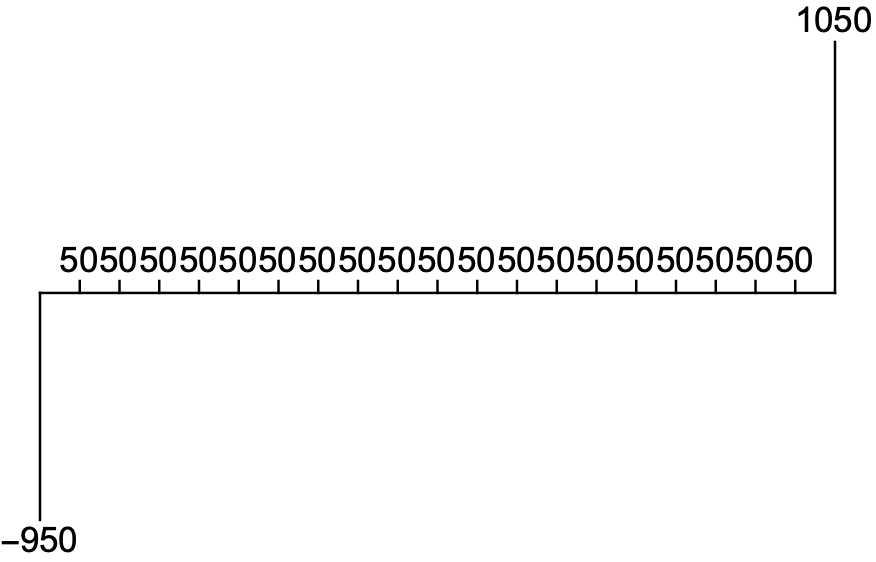

In [57]:
Image(filename = PATH + "/Images/img6.png", width = 300, height = 200)

The associated discount factors for each period are:

In [58]:
import sympy as sym

In [59]:
y = sym.symbols('y')

In [60]:
# Notice the dtype 'object'

vnDiscountFactors = np.array([(1+y/2)**(-i) for i in range(21)])
vnDiscountFactors

array([1, 1/(y/2 + 1), (y/2 + 1)**(-2), (y/2 + 1)**(-3), (y/2 + 1)**(-4),
       (y/2 + 1)**(-5), (y/2 + 1)**(-6), (y/2 + 1)**(-7), (y/2 + 1)**(-8),
       (y/2 + 1)**(-9), (y/2 + 1)**(-10), (y/2 + 1)**(-11),
       (y/2 + 1)**(-12), (y/2 + 1)**(-13), (y/2 + 1)**(-14),
       (y/2 + 1)**(-15), (y/2 + 1)**(-16), (y/2 + 1)**(-17),
       (y/2 + 1)**(-18), (y/2 + 1)**(-19), (y/2 + 1)**(-20)], dtype=object)

In [61]:
pv = vnCashFlows.dot(vnDiscountFactors)
pv

-950 + 50/(y/2 + 1) + 50/(y/2 + 1)**2 + 50/(y/2 + 1)**3 + 50/(y/2 + 1)**4 + 50/(y/2 + 1)**5 + 50/(y/2 + 1)**6 + 50/(y/2 + 1)**7 + 50/(y/2 + 1)**8 + 50/(y/2 + 1)**9 + 50/(y/2 + 1)**10 + 50/(y/2 + 1)**11 + 50/(y/2 + 1)**12 + 50/(y/2 + 1)**13 + 50/(y/2 + 1)**14 + 50/(y/2 + 1)**15 + 50/(y/2 + 1)**16 + 50/(y/2 + 1)**17 + 50/(y/2 + 1)**18 + 50/(y/2 + 1)**19 + 1050/(y/2 + 1)**20

The above is a symbolic expression in sympy

In [62]:
type(pv)

sympy.core.add.Add

Next we need a way to solve an equation for y. Sympy has limited capability to solve this symbolically, which is typically not possible in this case (although the equation can be written polynomial, its degree it greater than 5). Instead, we will use numerical optimization methods from scipy, in the form of <a href= "https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#root-finding" target = "_blank">root finding algorithms</a>.  

In [63]:
from scipy import optimize

Here we will use <a href="https://en.wikipedia.org/wiki/Brent%27s_method" target="_blank">Brent's method</a>.

In [64]:
help(optimize.brentq)

Help on function brentq in module scipy.optimize.zeros:

brentq(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)
    Find a root of a function in a bracketing interval using Brent's method.
    
    Uses the classic Brent's method to find a zero of the function `f` on
    the sign changing interval [a , b]. Generally considered the best of the
    rootfinding routines here. It is a safe version of the secant method that
    uses inverse quadratic extrapolation. Brent's method combines root
    bracketing, interval bisection, and inverse quadratic interpolation. It is
    sometimes known as the van Wijngaarden-Dekker-Brent method. Brent (1973)
    claims convergence is guaranteed for functions computable within [a,b].
    
    [Brent1973]_ provides the classic description of the algorithm. Another
    description can be found in a recent edition of Numerical Recipes, including
    [PressEtal1992]_. A third description is at
    http://

Brent's method takes as input a <i>continuous</i> (scalar) function and two <i>guesses</i>, $a_1 < a_2$, values where the function has opposite signs (therefore, by the Intermediate Value Theorem, the existence of a root between them is guaranteed). 

We already defined a function to compute present values, PV_multiple, and we'll make it scalar by passing in other arguments.

In [65]:
def fxPV(rate):
    return PV_multiple(vnCashFlows, rate, 2, 10)

Let's graph it to get a sense for the guesses. In our example, the bond pays $100$ per year and the price is $950$, so our initial estimate is that the yield is $100/950$, and we'll graph the function nearby this value. 

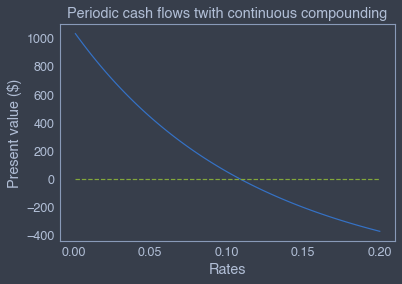

In [66]:
rates = np.linspace(0.001, 0.2, 100)

present_values = np.array([fxPV(rate) for rate in rates])
intercept = np.zeros(len(rates))

fig, ax = plt.subplots(figsize = (6,4))
ax.plot(rates, present_values)
ax.plot(rates,intercept, '--')
ax.set(xlabel='Rates', ylabel='Present value ($)',
       title='Periodic cash flows twith continuous compounding')
ax.grid()

plt.show()

We'll use as rough estimates $a_1 = 0.1$, $a_2 = 0.125$ in our call to brentq.

In [67]:
optimize.brentq(fxPV, 0.1, 0.125)

0.10830934339596773

The IRR for this cash-flow problem is $10.83\%$. 

### Tools for PV and FV calculations

Mathematica contains various built-in functions for computaitons of PV e FV. These are based on the compounding interval, $q$, rather than the the compounding frequency $k$. 

We'll define simmilar functions in Python.

In [68]:
def time_value(s, r, t):
    """Calculates the time value of a security s at t 
    compounding periods, for a nominal interest specified by r. 
    Computes future value if t is positive
    and present value if t is negative.
    If t_0 is specified, computes """
    return s*((1+r)**t)

In [69]:
# Future value of $1000 at an effective rate of 5% for 3
# compounding periods

time_value(1000, 0.05, 3)

1157.6250000000002

In [70]:
# Present value of $1000 at 5% for 3 compounding periods

time_value(1000, 0.05, -3)

863.837598531476

Next we define a function to compute effective interest rates. 

In [71]:
def effective_interest(r, q):
    """Gives the effective interest rate corresponding to interest
    specification r, compounded at time intervals q."""
    return (1+q*r)**(1/q)-1

In [72]:
effective_interest(0.05, 1/12)

0.051161897881732976

Future value of $1000$ at an interest rate of $5\%$ compounded quarterly for 10 years.

In [73]:
time_value(1000, effective_interest(0.05, 1/4), 10)

1643.619463487009

Present value of $\$1999$ at $5\%$ interest compounded semi-annually, received in 10 years. 

In [74]:
time_value(1000, effective_interest(0.05, 1/2), -10)

610.2709428588303

In [75]:
# We can make time_value work with symbolic arguments
c = sym.symbols('c')
r = sym.symbols('r')
n = sym.symbols('n')

In [76]:
time_value(c,r,n)

c*(r + 1)**n

We'll define a function annuity, which creates an array of equaly spaced payments.

In [77]:
def annuity(v,n, q = 1):
    """Creates a series of n equal payments (notice this may
    not correspond to actual number of time units) occuring at 
    time intervals q."""
    return np.array([np.full(n,v), [q*i for i in range(1,n+1)]])

In [78]:
annuity(100, 20)

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20]])

In [79]:
annuity(100, 20, 1/2)

array([[100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
        100. , 100. ],
       [  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
          5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
          9.5,  10. ]])

We'll also create a function called cash flow, which creates a 2xn array of cash flows, the first row of which denotes time, the second a monetary value.

In [80]:
#def cash_flow()

## Fixed income securities

Fixed income securities are financial instruments that represent the seller's promosie to pay a "fixed" set of payments to the buyer (https://en.wikipedia.org/wiki/Fixed_income). 

the term "fixed" must be taken in context; the interest reate upon which the payments are based may very with market ocnditions. 

### Markets for cash

#### Savings deposits

The simplest is the demand deposit, in which the cash must be return upon the demand of the owner. The other alternates, time deposit accounts and certificates of deposite, require the funds to remain for a fixed period of time. 

#### Money market instruments

These are short-term borrowing by corporations or banks. The term commercial paper is used to describe unsecurer loads of this type. 

#### U.S. Government securities

These are a form of what is called <i>sovereign debt</i>.

* <b>U.S. Treasury bills</b>: Issued in denominations of $\$10,000$ or more and fixed maturities of 12, 26, and 52 weeks. They are sold at discount. Thus, for example, a $\$10,000$ 12-week bill at a $5\%$ yield would be sold for $$\frac{10000}{1+\frac{0.05}{4}} = 9876.54$$
* <b> U.S. Treasury notes</b>: Have maturities of 1 to 10 years and are sold in denominations of $\$1000$ or more. The holder receives a fixed coupon payment every six months until the end of the term at which time the holder receives the final coupon payment and the return of the face or principal amount of the note. 
* <b> U.S. Treasury bonds</b>: Have maturities of 10 years or more. They make semi-annual coupon payments like Treasury notes, but are callable, i.e., at scheduled coupon payment dates the Treasury can call the bond, redeeming it by returning the face amount at that time. 
* <b> U.S. Trasury strips</b>: aer Treasuris whose coupon and principal payments have been stripped into separate instruments. For example, a $\$1000$, 10-year bond would be stripped into its 20 coupon payments plus its principal. These individual instruments, each of which are a single fixed payment at fixed point in time, are called zero coupon bons. 

#### Other bonds

* <b>Municipal bonds</b>: are issued by government (Federal, state and local) to help fund their operations or capital projects. Some bonds are revenue bonds, whicha re guaranteed by the revenue from a specific project such as a bridge or highway, and general obligation bonds, which are guaranteed by the taxing authority of the government agentcy. The interest income is exempt from Deferal taxes and from state and local taxes in the issuing state. This allows government agencies to pay a lower rate than other borrowers. 
* <b>Corporate bonds</b>: are issud by corporations to raise capital for their oprations and capital projects. Depending upon de borrower, such bonds carry varying risks of default, i.e., failure of the issuer to repay the debt. The higher the risk of default, the higher the interest rate that must be paid in order to compensate lenders to take that risk. 

#### Special conditions

* Sinking funds are ofetn set up in which the borrower is required to set aside cash in preparation for paying the bond. 
* Callable bonds can be redeemed at the issuer's discretion at specified points over the term of the debt. 
* Subordination of debt occurts when other more senior debt must be paid off first. More senior debt obviously carries less risk than less senior debt. 
* Secured bonds are debt which is secured by specific assets. Holders of secured bonds can seek to recover the asset if the issuer detaults. 

#### Mortgages

A mortgage is a loan secured by some asset. The terms are usually the reverse of that of a bond. The holder receives a fixed amount of cash from the issuer and usually agrees to pay a series of equal payments at regular intervals over a specified term. Most homes are purchases with teh help of a mortgage. 

#### Annuities

In an annuity a contract is entered into in which the holder or annuitant is paid money according to a set schedule over some period of time. There are several types of annuities [EXAMPLES]. Sometimes the payments are fixed and sometimes the payments are based on an index or market rate. 

### Valuation

#### Perpetual annuity

A parpetual annuity, sometimes called a consol, is one in which the holder gives the issuer an amount $S$ and the issuer agrees to pay the holder a coupon $c$ at regular intervals in perpetuity. 

$$S = \sum_{i=1}^{\infty} c\left(1+\frac{y}{k}\right)^{-i} = \frac{ck}{y} $$

For example, the value of a consol with a semi-annual coupon of $\$100$ where the annual rate is $5\%$ is $\$4000$. 

In [81]:
2*100/0.05

4000.0

#### Finite life streams

Consider a variation on the above in which the payment ends after $n$ periods, 

$$ P = \sum_{i = 1}^{n} c\left(1+\frac{r}{k}\right)^{-i}$$

$$ P = \sum_{i = 1}^{nk} c\left(1+\frac{r}{k}\right)^{i} = \frac{ck}{r}\left(1-\left(1+\frac{r}{k}\right)^{nk}\right)$$

The derivation of this formula is straightforward. We can consider the finite stream over n-years as represented by one perpetual annuity less another perpetual annuity that commences n-years hence. This difference produces the identical cash-flows, and, therefore, its PV is the same as that of the finite stream. The PV of the first peputual annuity is $c/r$ and the PV of the second perpetual annuity is 
$$\frac{c}{r(1+r)^n}.$$

For example, the value of an annuity with a semi-annual coupon of $\$100$ where the annual rate is $5\%$ and the term is 10 years. This is a finite stream with $r = 2.5\%$ and $n=20$:

In [82]:
(100/0.025)*(1-1/((1+0.025)**20))

1558.9162285646764

Using the same example, the value of an annuity with a semi-annual coupon of $\$100$ where the anual rate is $5\%$ and the terms if 10 years is

In [83]:
PV_multiple(np.insert(annuity(100, 2*10, 1/2)[0, :], 0, 0), 
            0.05, 2, 10)

1558.9162285646821

Or using closed form solution

In [84]:
((2*100)/0.05)*(1-1/((1+0.05/2)**(2*10)))

1558.9162285646764

The usual convention in most markets is to describe the term in years, the rate as a nominal annual rate, and the compounding frequency in frequency per year.

## Mortgages

Mortgages are loans secured by real property. In other words the bank or financial institution has a claim on the property in the event the mortgage is not repaid. Mortgage loans vary considerably in their terms.

Fixed-rate, fixed-term loans are the most common. Some other forms will also be covered. 

Most purchases of real property are accomplished by placing a down payment to cover a portion of the price and then financing a significant portion of the residual through a mortgage.

Read http://en.wikipedia.org/wiki/Mortgage for more information.

### Fixed-rate, fiexed-term mortgages

In a fixed-rate, fixed-term mortgage the borrower receives the initial loan balance $B$ from the lender and agrees to pay the lender a stream of fixed payments $p$ at regular intervals $k$ times per year until the end of the term of the loan. These payments are typically monthly and are computed based on a nominal annual rate $r$.

The payments $p$ are computed so that the $PV$ of the payment stream at the mortgage's interest rate $r$ and payment frequency $k$ matches the initial loan balance $B$:

$$\left\{ p \left| B = p\sum_{i=1}^{nk} \left(1+\frac{r}{k}\right)^{-i} \right. \right\}$$

Here is the cash flow from the perspective of the borroewer, who recives the balance $B$ of the mortgage at the beginning and makes $k$ (almost always monthly) payments $p$ over the term of the loan:

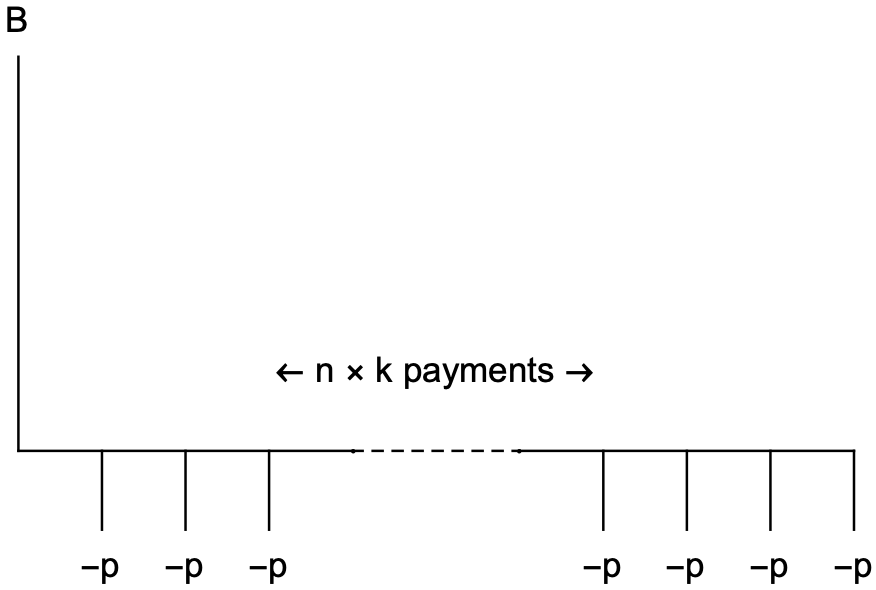

In [85]:
Image(filename = PATH + "/Images/img7.png", width = 300, height = 200)

#### Example: computing the monthly payment

Consider a monthly mortgage for $\$95000$ borrowed for 15 years at a rate of $4.5\%$. 

<i>Author's note</i>

Recall that to use Brent's method we need an initial guess. Our naive estimate will be simply the total of the loan divided by the number of payments (as if there was no interest):

In [86]:
95000/(15*12)

527.7777777777778

Let's create a scalar function to model this problem:

In [87]:
def fxPayment(p):                   
    cashflow = np.array([time_value(p, 
                                    effective_interest(0.045, 1/12),
                                    -15+(i)/12)
                         for i in range(12*15)])
    return 95000 - np.sum(cashflow)

In [88]:
effective_interest(0.045, 1/12)

0.04593982504058958

In [89]:
fxPayment(100)

81927.98989712624

Let's plot the graph in a vicinity of this value. 

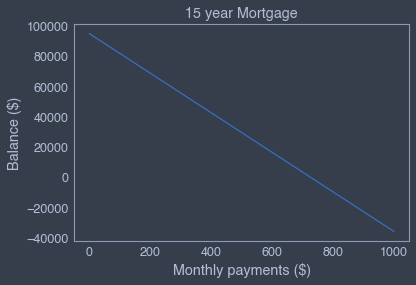

In [90]:
# Data for plotting
t = np.arange(0, 1000, 0.1)
s = np.array([fxPayment(p) for p in t])

fig, ax = plt.subplots(figsize = (6,4))
ax.plot(t, s)

ax.set(xlabel='Monthly payments ($)', ylabel='Balance ($)',
       title='15 year Mortgage')
ax.grid()

plt.show()

We now solve for $p$

In [91]:
optimize.brentq(fxPayment, 500, 800)

726.7436243727747

Notice that this is indeed a linear problem in $p$, so we don't need a numerical method here. 

### Example: computing an affordable mortgage amount

A home buyer estimates that she can afford a mortgage of $\$575$ per month. If current 30-year mortgage rates are $3.75\%$, then what is the maximum mortgage that she can afford?

In [92]:
PV_multiple(np.insert(annuity(575,30*12,1/12)[0, :],
                      0,0),
            0.0375, 12, 30)

124159.06751229364

### Amortization of a fixed-rate, fixed-term mortgage

At each payment date a portion of the payment goes to paying the interest accrued since the last payment. The remainder is used to pay down the remaining balance owed on the loan. Amortization here refers to the calculation of interest and principal paid at each payment of a loan. 

One approach is to compute it recursively. Let 
<ul>
    <li> $B_i$ denote the balance at the end of the i-th payment period.</li>
    <li> $I_i$ denote the interest accrued during the i-th payment period. </li>
    <li> $P_i$ denote the principal paid during the i-th payment period.</li> 
</ul>

The recursion is initialized with $B_0 = B$, then for $i$ from $1$ to $nk$, 
<ul>
    <li> the interest accrued is the amount owed at the end of the prior period times the periodic rate:
        $$I_i = \frac{rB_{i-1}}{k};$$
    </li>
    <li>the principal paid is that portion of the periodic payment that is not required to coved the accrued interest:
        $$P_i = p-I_i;$$
    </li>
    <li> the new balance is the prior balance less the principal paid:
        $$B_i = B_{i-1} - P_i;$$
    </li>
</ul>
        
#### Example: recursive amortization calculation

The amoortization calculation is illustrated by an example. For simplicity, we will assume that the mortgage payments occur semi-annually:

In [93]:
nLoanAmount = 100000
nAnnualRate = 0.05
iTerm = 15
iFrequency = 2

The semi-annual mortgage payment is obtained through Brent's method. We'll create a scalar function

In [94]:
def amortize(balance, payment, annual_rate, term, frequency):
    schedule = {0: [balance,0,0]}
    for i in range(1,term*frequency + 1):
        interest = annual_rate*schedule[i-1][0]/frequency
        principal = payment - interest
        schedule[i] = [schedule[i-1][0]- principal, 
                       interest,
                       principal]
    df = pd.DataFrame.from_dict(schedule, 
                                columns = ['Remaining balance', 
                                           'Interest paid', 
                                           'Principal paid'],
                                orient = 'index'
                               )
    return df

In [95]:
import pandas as pd

In [128]:
amortize(nLoanAmount, 4700, nAnnualRate, iTerm, iFrequency)

,Remaining balance,Interest paid,Principal paid
0,100000.000000,0.000000,0.000000
1,97800.000000,2500.000000,2200.000000
2,95545.000000,2445.000000,2255.000000
3,93233.625000,2388.625000,2311.375000
4,90864.465625,2330.840625,2369.159375
5,88436.077266,2271.611641,2428.388359
6,85946.979197,2210.901932,2489.098068
7,83395.653677,2148.674480,2551.325520
8,80780.545019,2084.891342,2615.108658
9,78100.058645,2019.513625,2680.486375


To find the ideal payment for this load, we need to find the value of $p$ that makes the final balance equal to $0$. One can easily show by induction that balances are computed according to the formula:

$$B_{i+1} = B_0\left(1+\frac{r}{k}\right)^{i} - \frac{pk}{r}\left(\left(1+\frac{r}{k}\right)^{i}-1\right)$$

Hence, we can set a scalar function that computed the final balance in two ways. The first utilized the amortization schedule above. The second, a closed formula. 

In [99]:
def fxMortgage(payment):
    schedule = amortize(nLoanAmount, payment, nAnnualRate, iTerm, iFrequency)
    return schedule['Remaining balance'].iloc[-1]

In [129]:
def fxFinalBalance(payment):
    interestFactor = 1+(nAnnualRate/iFrequency)
    interestAccrued = nLoanAmount*(interestFactor**(iTerm*iFrequency))
    interestPaid = (payment*iFrequency/nAnnualRate)*(interestFactor**(iTerm*iFrequency)-1)
    return interestAccrued - interestPaid

In [131]:
%time
fxMortgage(4700)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


3414.053040802314

In [132]:
%time
fxFinalBalance(4700)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


3414.053040802857

Let's plot this function to obtain an estimate by visual inspection. 

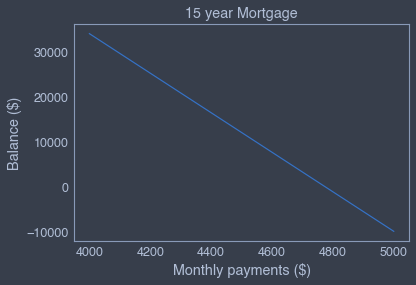

In [107]:
# Data for plotting
t = np.arange(4000, 5000, 0.1)
s = np.array([fxMortgage(p) for p in t])

fig, ax = plt.subplots(figsize = (6,4))
ax.plot(t, s)

ax.set(xlabel='Monthly payments ($)', ylabel='Balance ($)',
       title='15 year Mortgage')
ax.grid()

plt.show()